# Lab 5 - Data Visualization

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## NFL Offense Data

1. Import the NFL week 3, 4, and 5 data and add a week column to dataset and set the value to 3, 4, or 5 for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Also merge the nfl_teams.csv data to this dataframe so that the division and conference info is included.

In [233]:
df = pd.read_csv("nfloffenseweek3.csv")
df.head()

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,406,2,5.6,18,8,44,5,42.9,8.6,35.63
1,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,...,511,5,5.9,20,15,129,5,40.5,5.4,31.05
2,3,Buffalo Bills,3,91,1324,213,6.2,5,3,77,...,337,1,4.7,22,20,136,6,46.7,16.7,47.46
3,4,Kansas City Chiefs,3,88,1122,180,6.2,3,2,68,...,279,2,4.1,15,15,124,8,45.2,6.5,40.73
4,5,Philadelphia Eagles,3,86,1341,208,6.4,1,0,73,...,451,6,4.4,26,23,173,6,39.4,3.0,45.06


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

<BarContainer object of 32 artists>

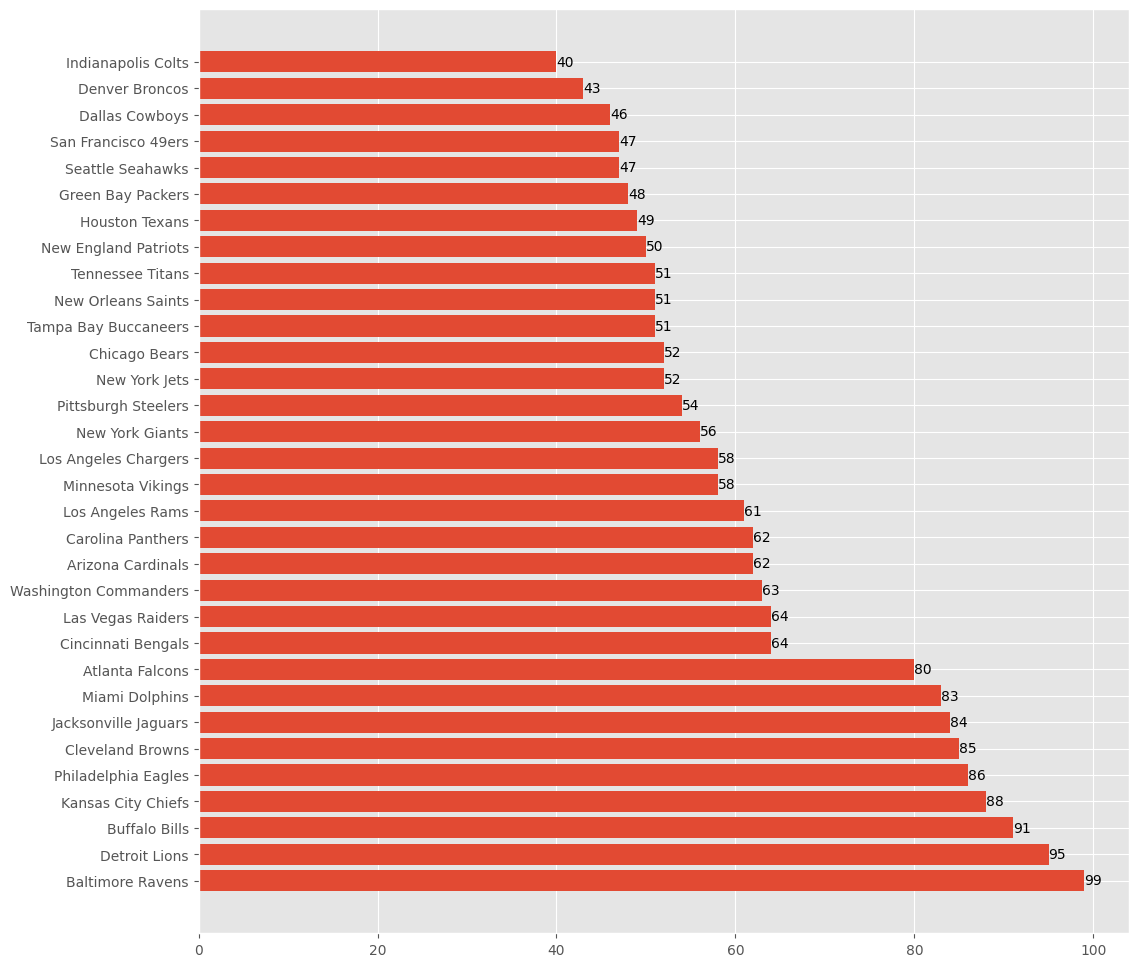

In [234]:
plt.figure(figsize=(12, 12))

#fig, ax = plt.subplots()
barhplot = plt.barh(df.team, df.points_scored )
plt.bar_label(barhplot, labels = df.points_scored)
barhplot

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

In [335]:
df1 = pd.read_csv("nfloffenseweek3.csv")
df2 = pd.read_csv("nfloffenseweek4.csv")
df3 = pd.read_csv("nfloffenseweek5.csv")

df1['week'] = 3
df2['week'] = 4
df3['week'] = 5

df = pd.concat([df1, df2, df3], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 31
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rank                        96 non-null     int64  
 1   team                        96 non-null     object 
 2   games                       96 non-null     int64  
 3   points_scored               96 non-null     int64  
 4   total_yards                 96 non-null     int64  
 5   offensive_plays             96 non-null     int64  
 6   yards_per_play              96 non-null     float64
 7   turnovers_lost              96 non-null     int64  
 8   fumbles_lost                96 non-null     int64  
 9   1st_downs                   96 non-null     int64  
 10  passes_completed            96 non-null     int64  
 11  passes_attempted            96 non-null     int64  
 12  passing_yards               96 non-null     int64  
 13  passing_touchdowns          96 non-nu

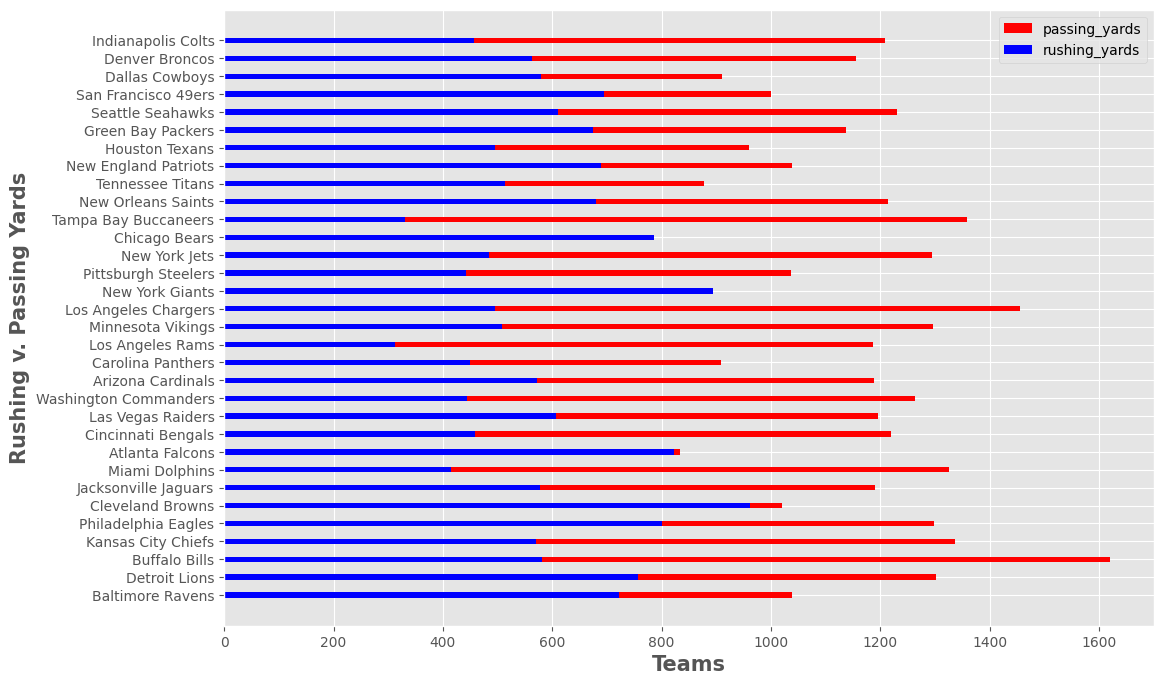

In [336]:
barWidth = .3
plt.subplots(figsize =(12, 8))


plt.barh(df.team, df.passing_yards, height = barWidth, color = 'red', label = 'passing_yards')
plt.barh(df.team, df.rushing_yards, height = barWidth, color = 'blue', label = 'rushing_yards')

plt.xlabel('Teams', fontweight ='bold', fontsize = 15)
plt.ylabel('Rushing v. Passing Yards', fontweight ='bold', fontsize = 15)
 
plt.legend()
plt.show()

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

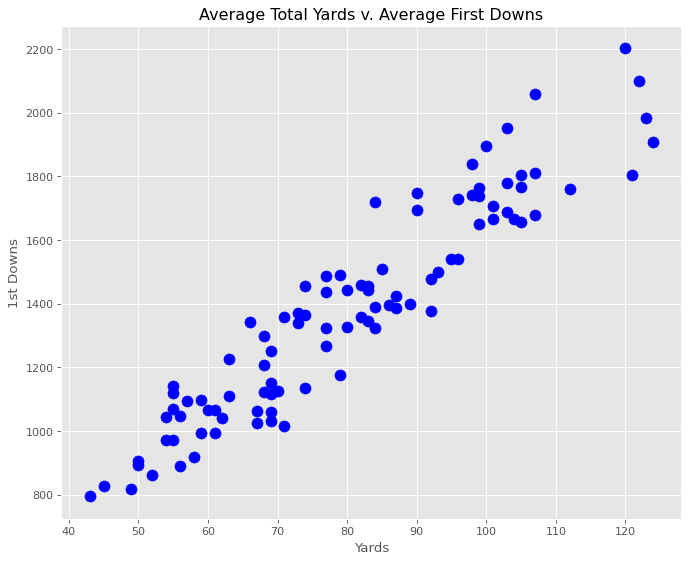

In [237]:
plt.figure(figsize=(10, 8), dpi=80)
 
plt.style.use('ggplot')

plt.title('Average Total Yards v. Average First Downs')
plt.xlabel('Yards')
plt.ylabel('1st Downs')
plt.scatter(x=df['1st_downs'], y = df['total_yards'], s = 100, color = 'blue')

plt.show()

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

In [268]:
df.team.unique()

array(['Baltimore Ravens', 'Detroit Lions', 'Buffalo Bills',
       'Kansas City Chiefs', 'Philadelphia Eagles', 'Cleveland Browns',
       'Jacksonville Jaguars', 'Miami Dolphins', 'Atlanta Falcons',
       'Cincinnati Bengals', 'Las Vegas Raiders', 'Washington Commanders',
       'Arizona Cardinals', 'Carolina Panthers', 'Los Angeles Rams',
       'Minnesota Vikings', 'Los Angeles Chargers', 'New York Giants',
       'Pittsburgh Steelers', 'New York Jets', 'Chicago Bears',
       'Tampa Bay Buccaneers', 'New Orleans Saints', 'Tennessee Titans',
       'New England Patriots', 'Houston Texans', 'Green Bay Packers',
       'Seattle Seahawks', 'San Francisco 49ers', 'Dallas Cowboys',
       'Denver Broncos', 'Indianapolis Colts'], dtype=object)

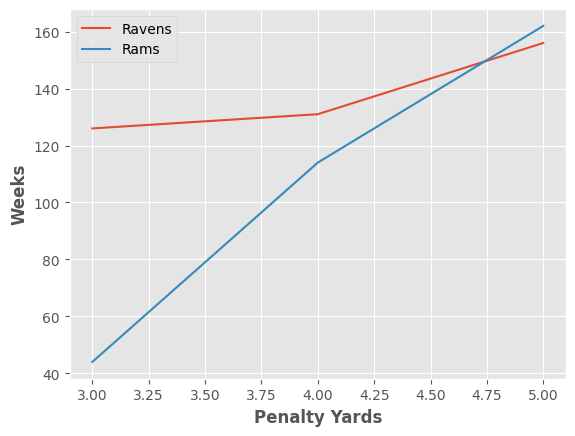

In [354]:
x = df.week.unique()
Ravens = df[df.team == 'Los Angeles Rams'].penalty_yards
Rams = df[df['team'].eq('Baltimore Ravens')].penalty_yards

plt.plot(x,Ravens)
plt.plot(x,Rams)

plt.legend(['Ravens', 'Rams'])

plt.xlabel('Penalty Yards', fontweight ='bold')
plt.ylabel('Weeks', fontweight ='bold')

plt.show()

6. Plot the average total points vs average yards per play for each team as a bar chart (with total points on the y-axis and yards per play on the x-axis).

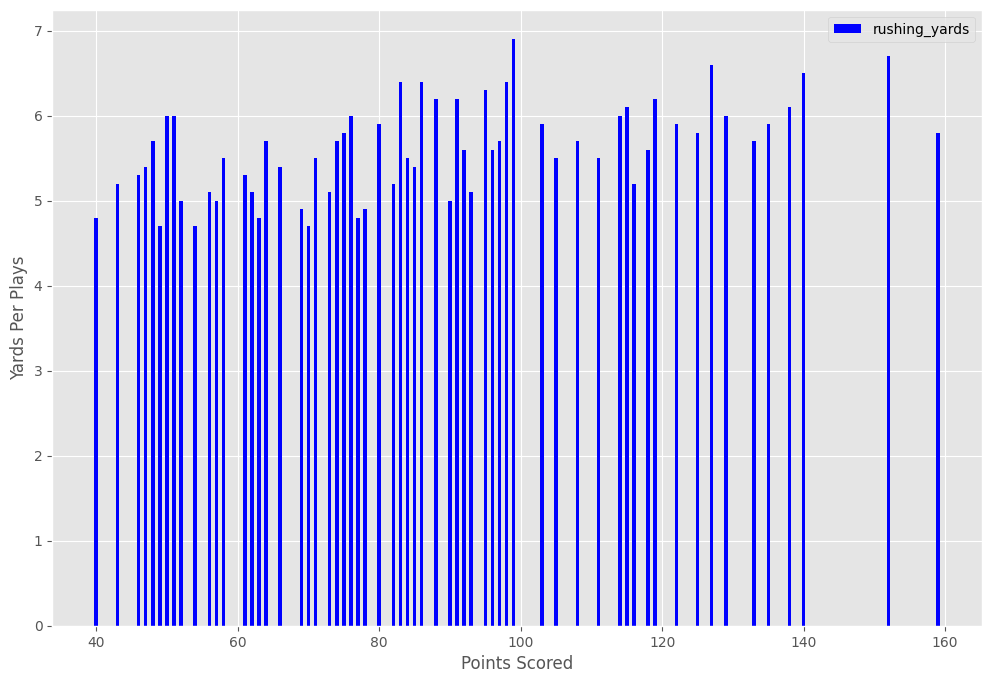

In [240]:
barWidth = .3
plt.subplots(figsize =(12, 8))

br1 = np.arange(len(df.passing_yards))
br2 = [x + barWidth for x in br1]

plt.bar(df.points_scored, df.yards_per_play, width = .5, color = 'blue', label = 'rushing_yards')

plt.xlabel('Points Scored')
plt.ylabel('Yards Per Plays')
 
plt.legend()
plt.show()

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

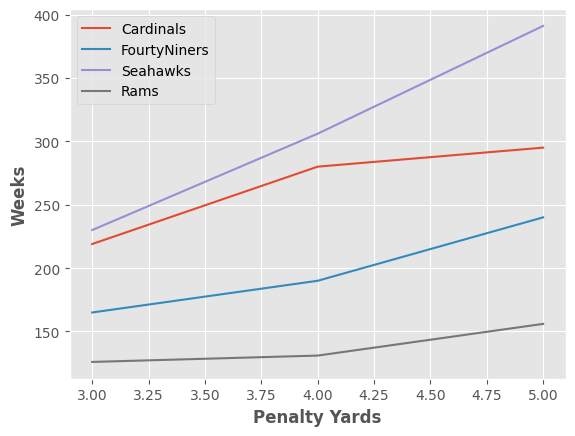

In [355]:
x = df.week.unique()
Cardinals = df[df.team == 'Arizona Cardinals'].penalty_yards
FourtyNiners = df[df.team == 'San Francisco 49ers'].penalty_yards
Seahawks = df[df.team == 'Seattle Seahawks'].penalty_yards
Rams = df[df.team == 'Los Angeles Rams'].penalty_yards

plt.plot(x,Cardinals)
plt.plot(x,FourtyNiners)
plt.plot(x,Seahawks)
plt.plot(x,Rams)

plt.legend(['Cardinals', 'FourtyNiners', 'Seahawks', 'Rams'])
plt.xlabel('Penalty Yards', fontweight ='bold')
plt.ylabel('Weeks', fontweight ='bold')

plt.show()

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

In [358]:
#Pass